In [128]:
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
FILE_NAME = "data_2022-08-05_10-00-05.pkl"

In [130]:
def read_file(file_path: str):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
    

In [131]:
data = read_file("test_data/" + FILE_NAME)

In [132]:
data_transformed = {ts: pd.Series({str(idx): value for idx, value in np.ndenumerate(value_matrix)}) for ts, value_matrix in data.items()}
df = pd.DataFrame.from_dict(data_transformed, orient='index')
df = df.melt(ignore_index=False, var_name='matrix_idx')
df.index.name = 'ts'
df.reset_index(inplace= True)
df

,ts,matrix_idx,value
0,2022-08-05 09:59:41.505152,"(0, 0)",41.0
1,2022-08-05 09:59:41.511884,"(0, 0)",41.0
2,2022-08-05 09:59:41.520660,"(0, 0)",41.0
3,2022-08-05 09:59:41.527345,"(0, 0)",41.0
4,2022-08-05 09:59:41.533840,"(0, 0)",41.0
...,...,...,...
2395,2022-08-05 10:00:05.123069,"(3, 5)",0.0
2396,2022-08-05 10:00:05.129614,"(3, 5)",0.0
2397,2022-08-05 10:00:05.136161,"(3, 5)",0.0
2398,2022-08-05 10:00:05.142759,"(3, 5)",0.0


<AxesSubplot:xlabel='ts', ylabel='value'>

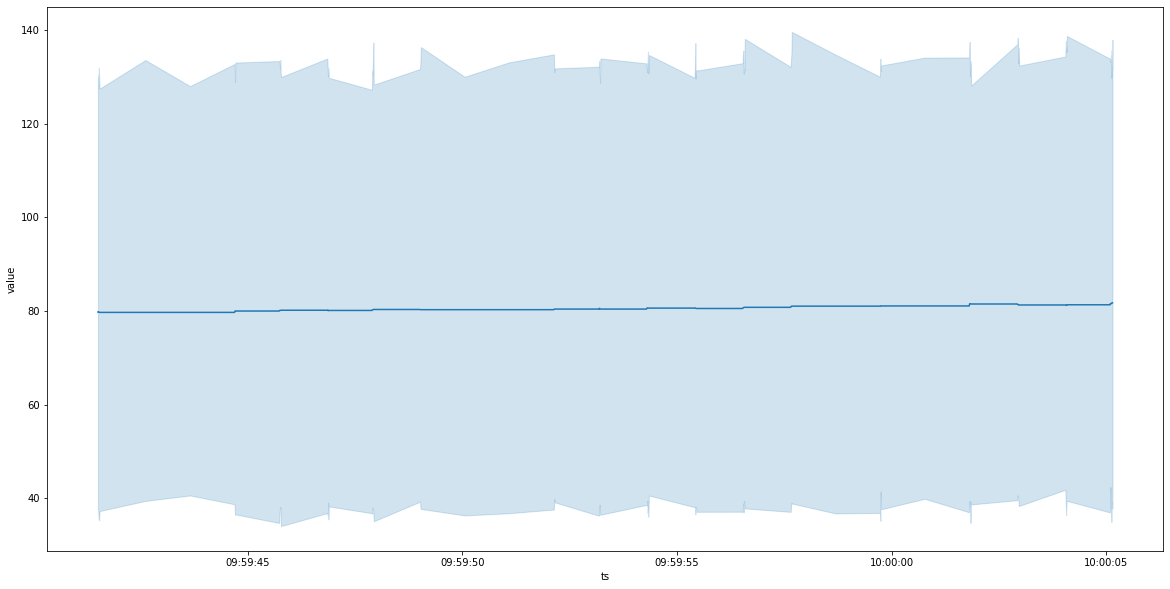

In [133]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value')

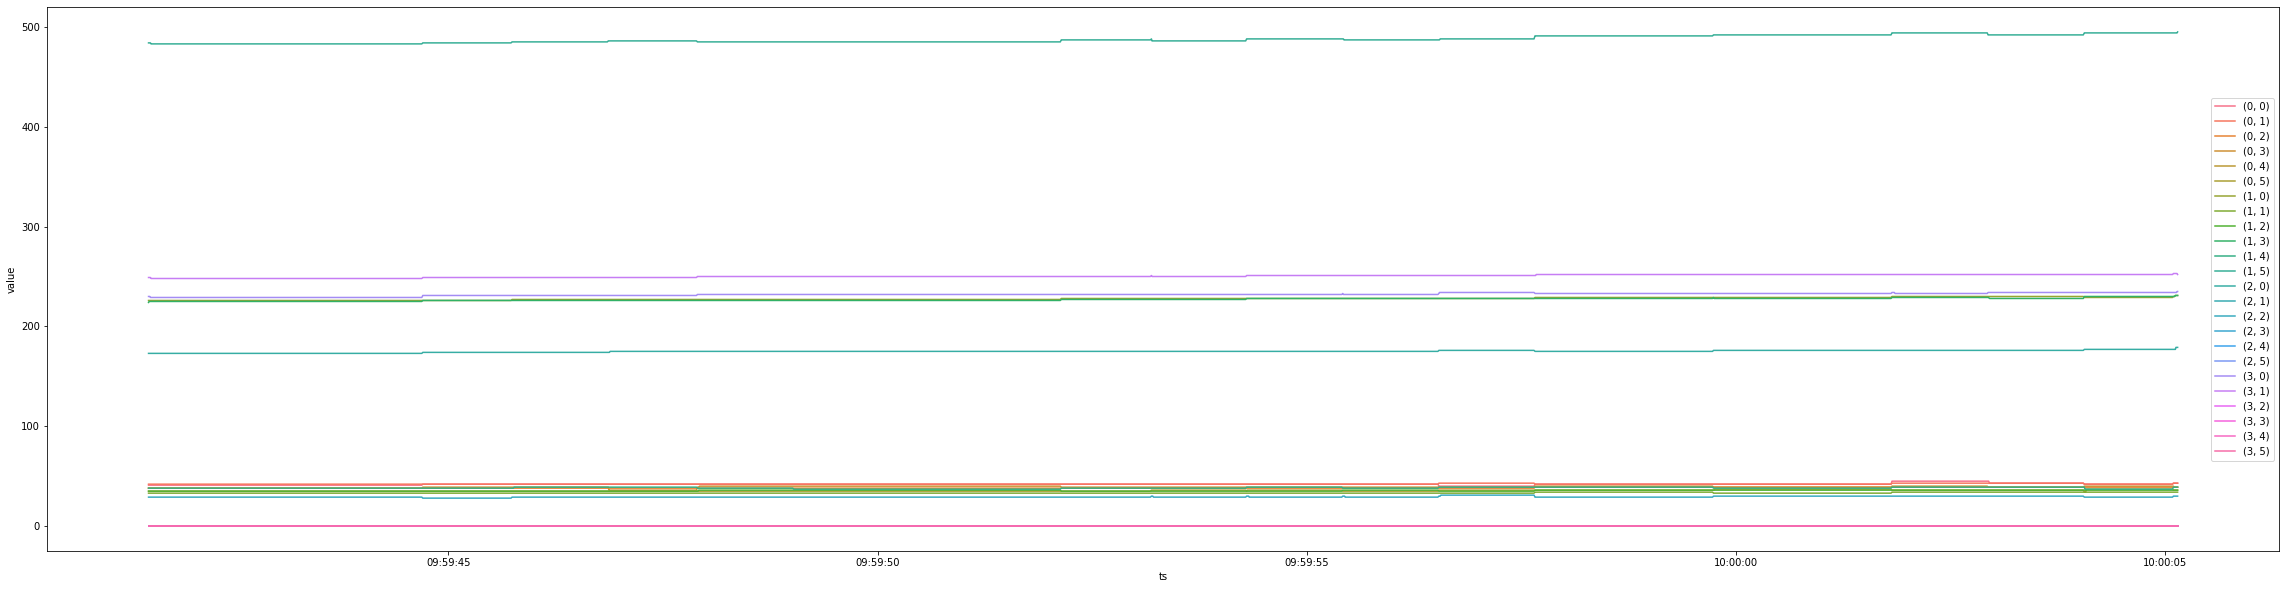

In [134]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
plt.legend(loc="center right")

In [144]:
CREATE_MARKERS = False

In [136]:
def create_shadow_marker():
    marker = {}
    sub_markers = ['start_shadow', 'end_shadow']
    for sub_marker in sub_markers:
        print(f"Press key for '{sub_marker}'")
        input()  # just wait for any keypress
        marker[sub_marker] = datetime.now()
    return marker

In [137]:
if CREATE_MARKERS:
    markers = []

In [143]:
if CREATE_MARKERS:
    markers.append(create_shadow_marker())

Press key for 'start_shadow'
Press key for 'end_shadow'


In [145]:
markers

[{'start_shadow': datetime.datetime(2022, 8, 5, 20, 27, 33, 735575),
  'end_shadow': datetime.datetime(2022, 8, 5, 20, 27, 47, 92392)},
 {'start_shadow': datetime.datetime(2022, 8, 5, 20, 28, 29, 998961),
  'end_shadow': datetime.datetime(2022, 8, 5, 20, 28, 37, 925173)},
 {'start_shadow': datetime.datetime(2022, 8, 5, 20, 29, 22, 883922),
  'end_shadow': datetime.datetime(2022, 8, 5, 20, 29, 30, 345489)}]

In [140]:
def plot_with_shadow_markers(data, markers):
    color_map = {'start_shadow': 'orange', 'end_shadow': 'blue'}

    fig, ax = plt.subplots(figsize=(40, 10))
    for marker in markers:
        for sub_marker, ts in marker.items():
            ax.axvline(ts, color=color_map[sub_marker])
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

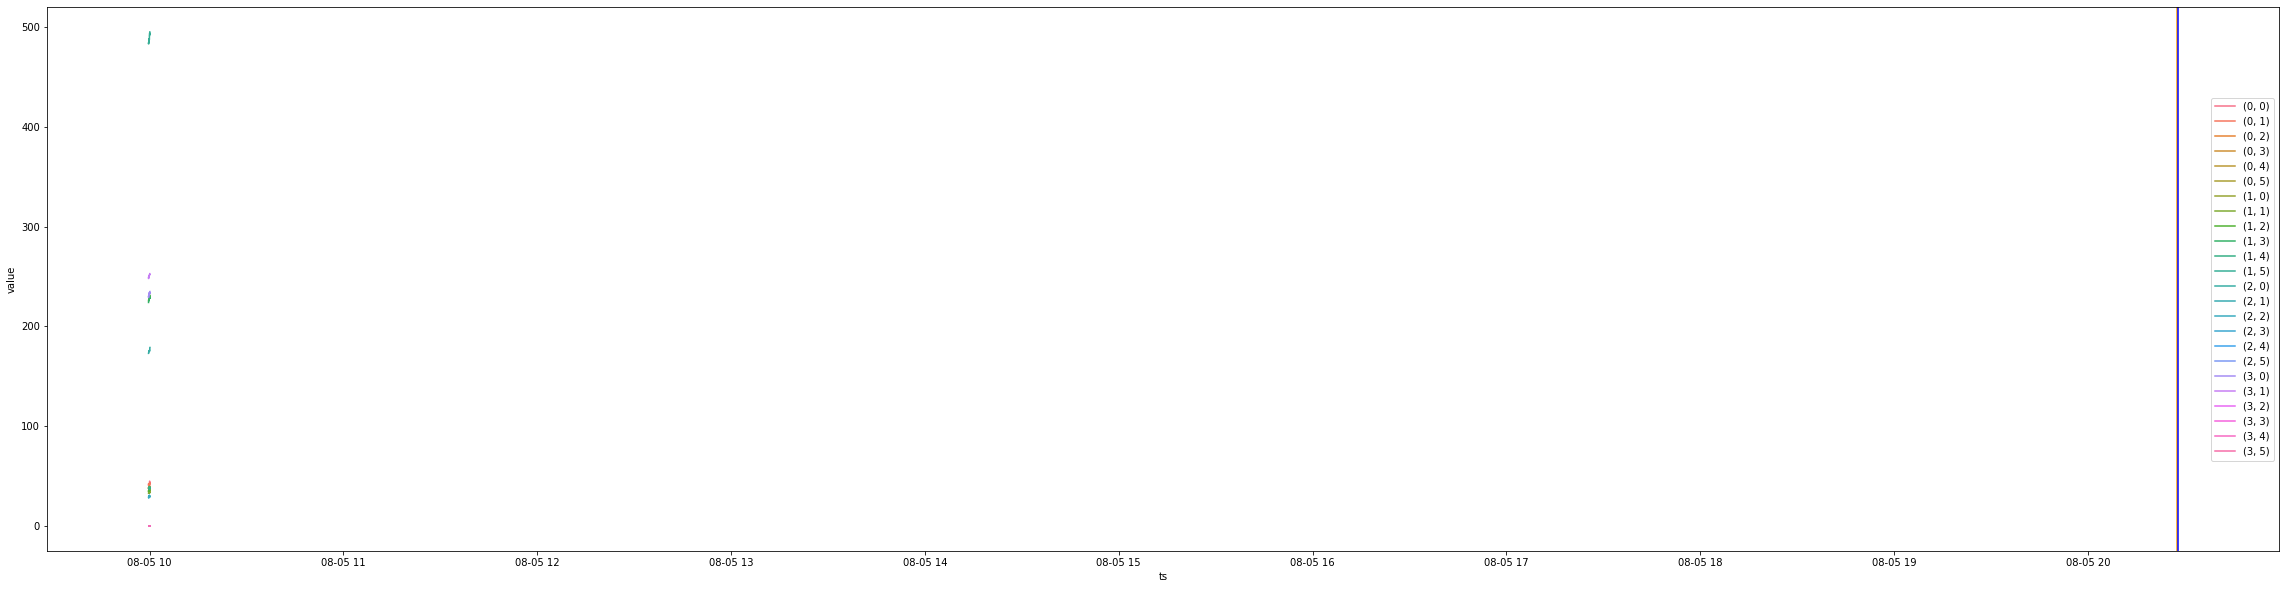

In [141]:
plot_with_shadow_markers(data, markers)